# Task 1 : Data preparation and customer analytics

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

To get started, download the resource csv data files below and begin performing high-level data checks such as:

- Creating and interpreting high-level summaries of the data
- Finding outliers and removing these (if applicable)
- Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember, our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [20]:
#IMPORT THE LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import xlrd
import re

#   Ignoring any warnings.

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Load the Dataset

In [21]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv',na_values='?',skipinitialspace=True)

In [22]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [23]:
transaction = pd.read_excel("QVI_transaction_data.xlsx")

In [24]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Descriptive Analytics: Summary statistics, visualizations

In [25]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We need to convert `DATE column` from int64 to `Datetime` datatype. 

In [26]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin = "1899-12-30", unit="D")

In [27]:
transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


In [28]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Missing Values

In [29]:
purchase.isna().sum().sum()

0

In [30]:
transaction.isna().sum().sum()

0

Both the Datasets has `No Null` values.

In [31]:
# don't need the 175g in PROD_NAME columns so removing it using str.rstrip.

# transaction['PROD_NAME'] = transaction['PROD_NAME'].str.rstrip('175g')
# print("\nDataFrame after rstrip:")
# transaction.head(2)

### Checking for Outliers

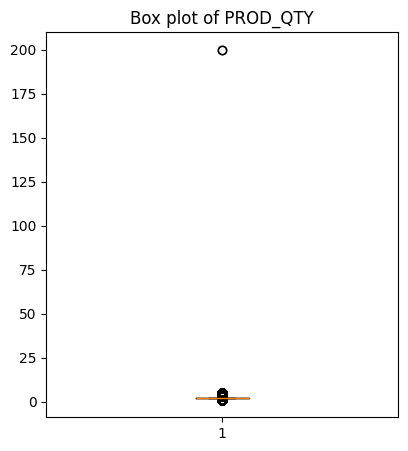

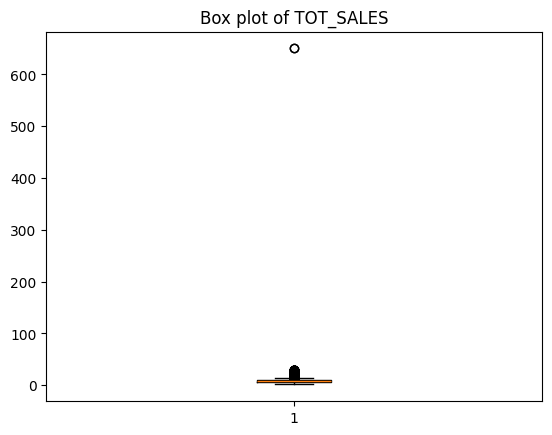

In [32]:
# Using a box plot to visualize outliers.

plt.figure(figsize=(10, 5))

# Box plot for feature1
plt.subplot(1, 2, 1)
plt.boxplot(transaction['PROD_QTY'])
plt.title('Box plot of PROD_QTY')
plt.show()

# Box plot for feature2
plt.subplot(1, 1, 1)
plt.boxplot(transaction['TOT_SALES'])
plt.title('Box plot of TOT_SALES')

plt.show()


After Visualizing Box plot for the column `PROD_QTY` and `TOT_SALES`, we can see there are some outliers present in the data.

In [33]:
transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


### Removing the Outliers

In [34]:
transaction = transaction[transaction["PROD_QTY"]<100]
transaction = transaction[transaction["TOT_SALES"]<500]
transaction = transaction.reset_index(drop=True)

In [35]:
transaction.shape

(264834, 8)

After removing outliers from `PROD_QTY` and `TOT_SALES`, we can spot two rows have been removed. Now the analysis will be slightly more accurate.

### Pack Size
- Extracting package sizes from `PROD_NAME`.

In [37]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace('SeaSalt', 'SeaSalt ')
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget


In [38]:
df["PROD_SIZE"]= df["PROD_NAME"].str.extract(r'(\d+)[gG]')   #   Extracting the package sizes from the product names, and storing them in a separate column. 
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175


In [39]:
df['PROD_NAME'] = df['PROD_NAME'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175


In [40]:
unique_products=list(df["PROD_NAME"].unique()) 
print("Total Unique Products:", len(unique_products))

Total Unique Products: 114


In [41]:
df["BRAND_NAME"]= df["PROD_NAME"].str.split().str[0]
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs


In [244]:
df = df[['DATE','STORE_NBR','LYLTY_CARD_NBR','PROD_NBR','PROD_NAME','PROD_SIZE','BRAND_NAME','PROD_QTY','TOT_SALES','LIFESTAGE','PREMIUM_CUSTOMER']]
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,5,Natural Chip Compny SeaSalt,175,Natural,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,66,CCs Nacho Cheese,175,CCs,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,96,WW Original Stacked Chips,160,WW,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,54,CCs Original,175,CCs,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,61,Smiths Crinkle Cut Chips Chicken,170,Smiths,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [245]:
df['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

- As we can see the typo error here `Dorito` and it's considering it a separate brand than `Doritos`. let's fix this.

In [246]:
# df['BRAND_NAME'] = df['BRAND_NAME'].replace('Dorito', 'Doritos', inplace= True)
df.loc[df['BRAND_NAME'] == 'Dorito', 'BRAND_NAME'] = 'Doritos'

In [247]:
df['BRAND_NAME'].value_counts()

BRAND_NAME
Kettle        41288
Smiths        28860
Doritos       28145
Pringles      25102
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [249]:
# Sorting the data according to the date column

df = df.sort_values(by="DATE").reset_index(drop=True)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_NAME,PROD_SIZE,BRAND_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,27,27181,70,Tyrrells Crisps Lightly Salted,165,Tyrrells,2,8.4,RETIREES,Budget
1,2018-07-01,180,180179,46,Kettle Original,175,Kettle,2,10.8,RETIREES,Premium
2,2018-07-01,164,164069,56,Cheezels Cheese Box,125,Cheezels,2,4.2,OLDER FAMILIES,Premium
3,2018-07-01,179,179216,24,Grain Waves Sweet Chilli,210,Grain,2,7.2,RETIREES,Premium
4,2018-07-01,18,18221,80,Natural ChipCo Sea Salt & Vinegr,175,Natural,1,3.0,MIDAGE SINGLES/COUPLES,Premium


In [307]:
df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69689
Name: count, dtype: int64

- `Mainstream` : the largest group of customers does not specifically aim for either the cheapest options or premium options.(The Majority of transactions made by this group)
- `Budget` : The next largest group (93,157 transactions) is made by Budget customers who are likely looking for cost-effective options.
- `Premium Customers`: The smallest group (69,689 transactions) is made by Premium customers who are likely purchasing higher-end, more expensive products.

In [256]:
# Calculate total spend per customer segment
total_spend_by_segment = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()

# Display the result
total_spend_by_segment

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506158.95


- `Mainstream` customers spends about 38%, `Budget` customers spends about 35% & `Premium` customers spends least about 26%.   

#### Grouping `Date` by `TOT_SALES` Column

In [257]:
Date_sales = df.groupby('DATE')['TOT_SALES'].sum().reset_index()
Date_sales.head()

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8
3,2018-07-04,5309.9
4,2018-07-05,5080.9


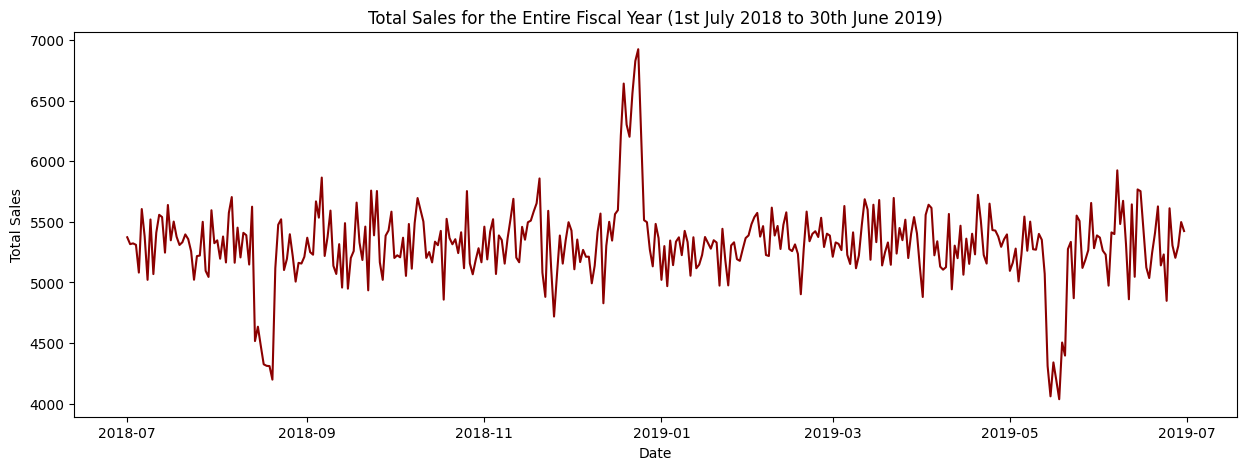

In [259]:
#   Plotting a line graph of the total sales for each date over the entire recorded duration.

plt.figure(figsize=(15, 5))
plt.plot(Date_sales["DATE"], Date_sales["TOT_SALES"], color="darkred")
plt.title("Total Sales for the Entire Fiscal Year (1st July 2018 to 30th June 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

- There is a significant spike occured around the end of December2018 and Beginning of January2019 in total sales, possibly due to Christmas and Newyear and their Promotions.
- There are some sudden drops but recovered quick, could be due stockouts, supply chain issues or short term market conditions. 

#### As the client is particularly interested in customer segments and their chip purchasing behaviour. 
-Let's draw insights on who spends on chips and what drives spends for each customer segment.

In [260]:
# Frequency of Purchase of Chips
df_chips = df[df['PROD_NAME'].str.contains('chips', case=False)] # filtering transactions where chips were purchased.

In [261]:
# Total Spend on Chips according to PREMIUM_CUSTOMER 

total_spend_chips_by_customer = df_chips.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
total_spend_chips_by_customer

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,118019.4
1,Mainstream,130709.1
2,Premium,87228.8


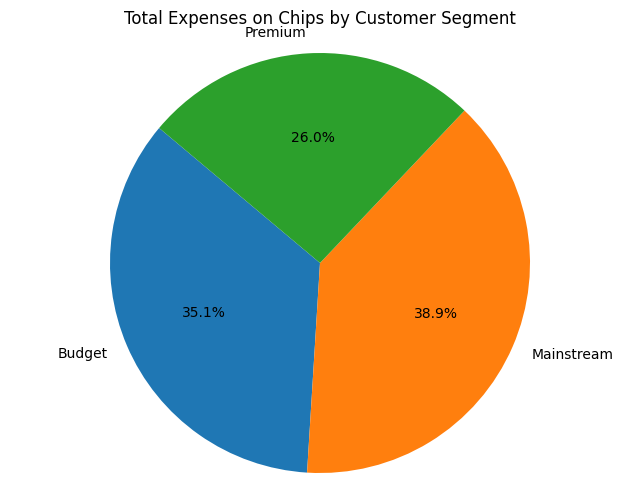

In [262]:
# Assuming total_spend_by_segment is your DataFrame containing total spend by each customer segment
labels = total_spend_chips_by_customer['PREMIUM_CUSTOMER']
sizes = total_spend_chips_by_customer['TOT_SALES']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Expenses on Chips by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [263]:
# Total Spends on Chips according to LIFESTAGE

total_spend_chips_by_customer = df_chips.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
total_spend_chips_by_customer


,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,31923.2
1,NEW FAMILIES,8607.4
2,OLDER FAMILIES,61508.9
3,OLDER SINGLES/COUPLES,69934.1
4,RETIREES,63348.9
5,YOUNG FAMILIES,55025.1
6,YOUNG SINGLES/COUPLES,45609.7


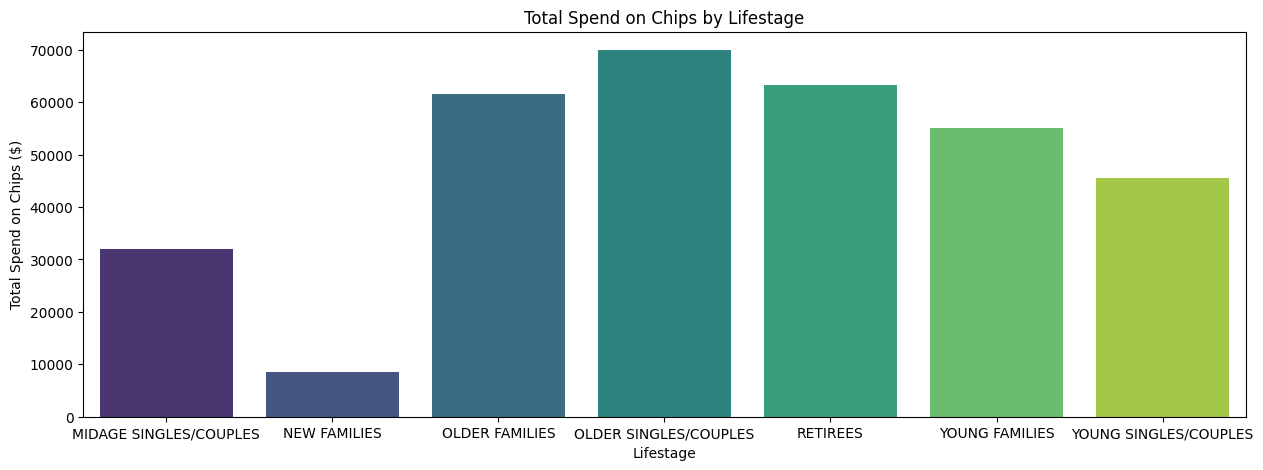

In [264]:
plt.figure(figsize=(15, 5))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=total_spend_chips_by_customer, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Total Spend on Chips ($)')
plt.title('Total Spend on Chips by Lifestage')

plt.show()

- `OLDER FAMILIES & OLDER SINGLES/COUPLES`: these group spends (nearly 70000$) highest on chips, they are the biggest consumers of chips.
- `Retirees`: this segment also spends a significant amount on chips, another major consumer.
- `YOUNG FAMILIES`: they have moderate level of spending on chips.
- `YOUNG SINGLES/COUPLES & MIDAGE SINGLES/COUPLES`: these groups have lower spend on chips compared to older segments and young famlies.
- `NEW FAMILIES`: This segment has the lowest total spend on chips, they consume the least amount of chips among these life stages.

** Older Families may have more members so they naturally consume more snacks like chips due to having more members. Though younger families might have children, they might be more health-conscious about their children's diet or they are most likely to save there income for future.
Older Families might have more social gatherings or events where chips are commonly consumed and Yonger families are most likely busy at work or engaged in activities outside the home so they consume less snacks.**

In [265]:
df['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48594
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

In [266]:
# Total sales for each package size (product size) 

total_sales_per_pack_size = df.groupby('PROD_SIZE')['TOT_SALES'].sum().reset_index()

total_sales_per_pack_size.head()

,PROD_SIZE,TOT_SALES
0,110,162765.4
1,125,5733.0
2,134,177655.5
3,135,26090.4
4,150,304288.5


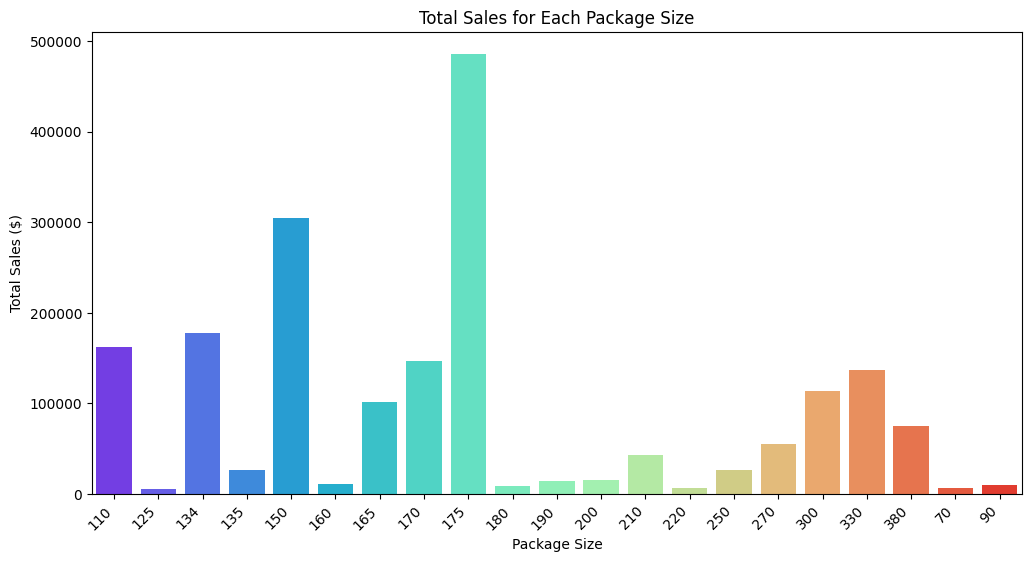

In [267]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_SIZE', y='TOT_SALES', data=total_sales_per_pack_size, palette='rainbow')
plt.xlabel('Package Size')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales for Each Package Size')
plt.xticks(rotation=45, ha='right')

plt.show()

- The `175g` package size has the highest total sales, most popular among the consumers. The `150g` size also show high sales, it's popular choices as well.
- The package sizes like `110g, 165g, 170g, 134g, 330g` have moderate sales but still have a significant market presence.
- Rest of the sizes shows relatively low sales means these sizes are not preferred by consumers.

In [268]:
# The total sales for each LIFESTAGE and PREMIUM_CUSTOMER

Total_sales_by_lifestage_and_customer = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

Total_sales_by_lifestage_and_customer

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


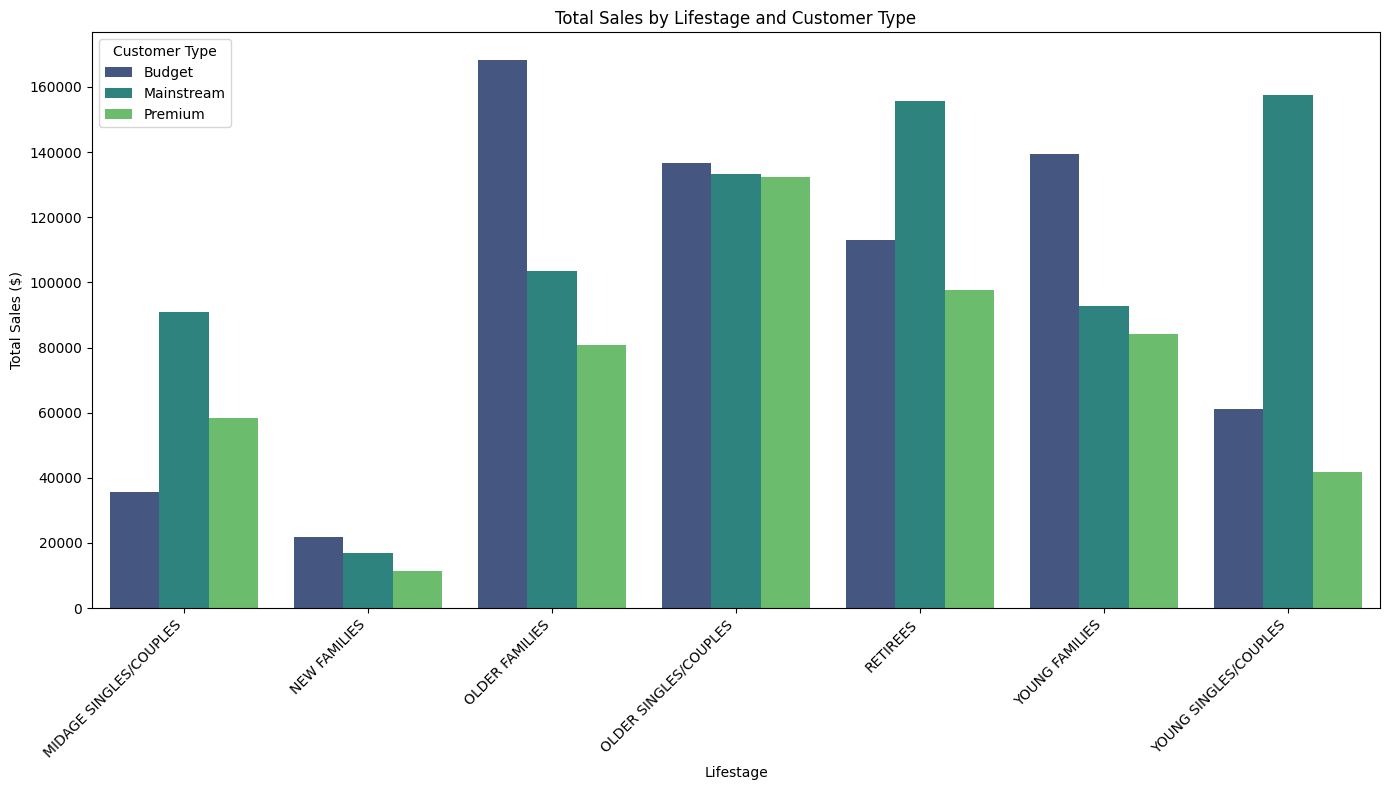

In [269]:
plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=Total_sales_by_lifestage_and_customer, palette='viridis')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Lifestage and Customer Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

- As we can see the `OLDER FAMILIES`, `OLDER SINGLES/COUPLES` & `RETIREES`(Loyal Customers) have already strong sales in Mainstream and Premium so we should offer them exclusive deals.
- we should increase engagement with Buget customers, particularly in `NEW FAMILIES`, `MIDAGE SINGLES/COUPLES` & `YOUNG SINGLES/COUPLES`, through discounts, value packs, and special promotions.

In [270]:
# Total Sales by Brand

total_sales_by_brand = df.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()

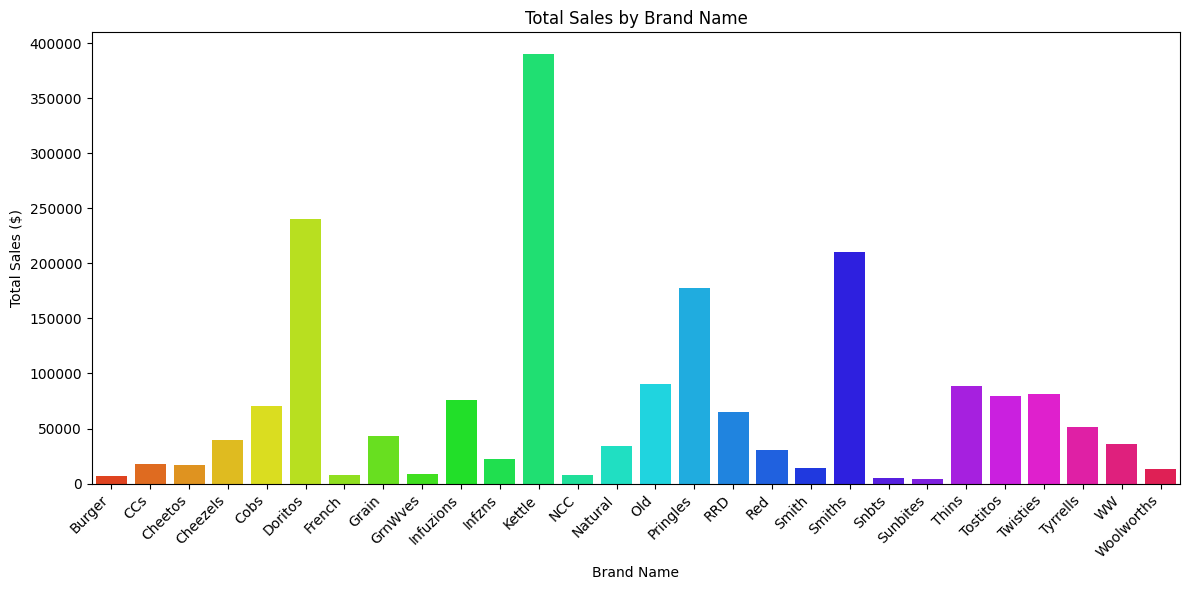

In [271]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='BRAND_NAME', y='TOT_SALES', data=total_sales_by_brand, palette='hsv')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- We can see `Kettle` has the highest sales, significantly higher than other brand so we should ensure that we have stock according to its demand and we should invest marketing to further boost Kettle's brand presence.
- Many Brands such as `CC`, `Burger`, `Cheezels` have much lower sales so it requires targeted marketing strategies to increase visibility and appeal so we should consider promotions, discounts or advertising campaigns to boost sales.
- Brands like `Smiths`, `Pringles` & `Doritos` are also performing well. Let's Analyze why these brands are performing well...

In [275]:
# Calculate the average price per unit for each brand and Group by brand name and calculate average price per unit.

df['PRICE_PER_UNIT'] = df['TOT_SALES'] / df['PROD_QTY']

avg_price_per_brand = df.groupby('BRAND_NAME')['PRICE_PER_UNIT'].mean().reset_index()
avg_price_per_brand = avg_price_per_brand.sort_values(by='PRICE_PER_UNIT', ascending=True)
avg_price_per_brand

,BRAND_NAME,PRICE_PER_UNIT
27,Woolworths,1.602502
21,Sunbites,1.700000
20,Snbts,1.700000
26,WW,1.844244
1,CCs,2.100000
0,Burger,2.300000
18,Smith,2.600000
17,Red,2.699771
16,RRD,2.886712
12,NCC,3.000000


- The Successful brands like `Kettle & Doritos` are priced higher still performing well, it means customer finds the product more desirable and perceives as higher quality product so for brands like `Smiths, Pringles & Doritos` we should invest more in marketing to highlight the quality and unique features.

In [279]:
total_sales_by_brand_and_customer_type = df.groupby(['BRAND_NAME', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales_by_brand_and_customer_type

,BRAND_NAME,PREMIUM_CUSTOMER,TOT_SALES
0,Burger,Budget,2527.7
1,Burger,Mainstream,2392.0
2,Burger,Premium,1911.3
3,CCs,Budget,6657.0
4,CCs,Mainstream,6507.9
...,...,...,...
79,WW,Mainstream,12484.9
80,WW,Premium,9914.6
81,Woolworths,Budget,4859.4
82,Woolworths,Mainstream,4882.2


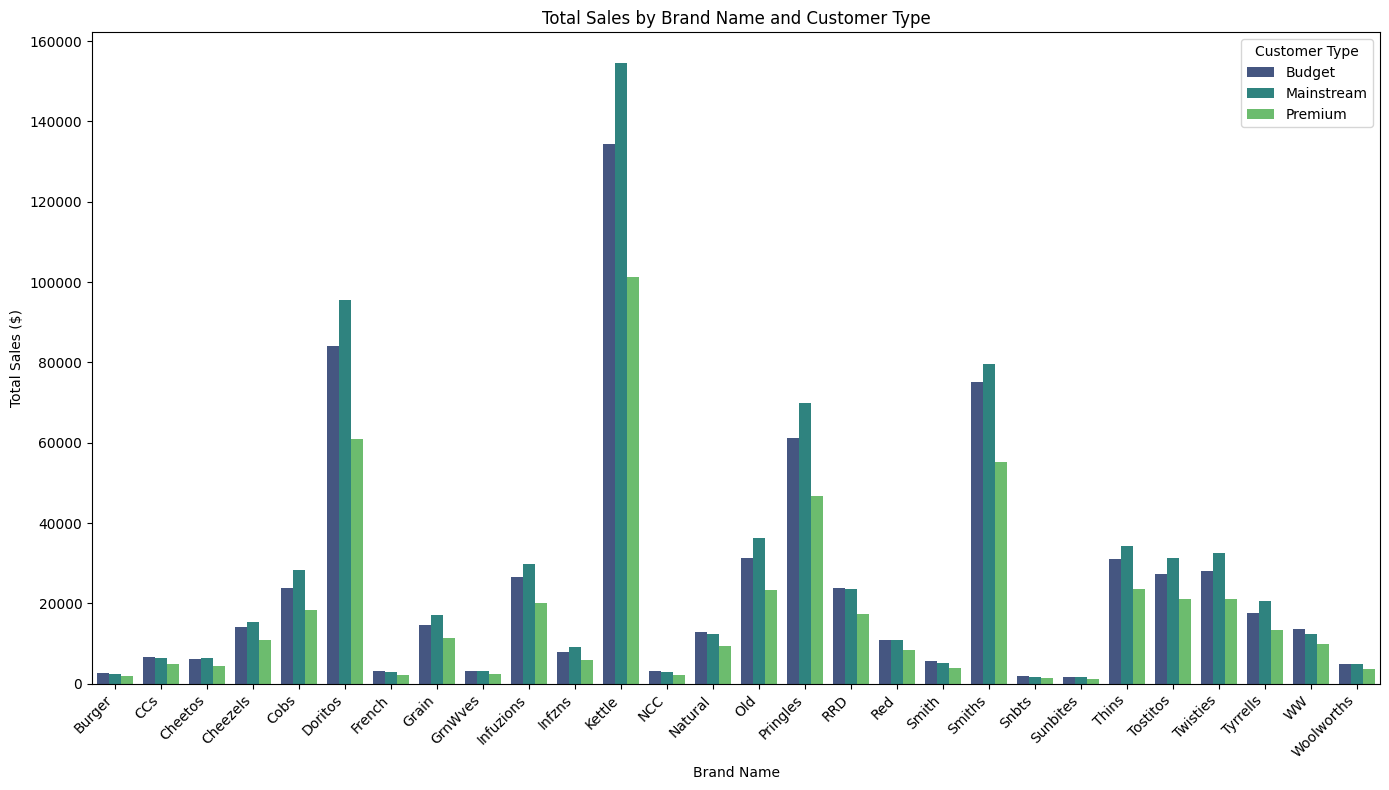

In [277]:
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='BRAND_NAME', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales_by_brand_and_customer_type, palette='viridis')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Brand Name and Customer Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


- I think Price isn't issue. `Old, Cheezels, Twisties, Tyrrells, Infzns` aren't cater by premium customers also so these lower performing brands should adjust their pricing and improve the quality and spend some expenses on marketing to be more competitive in the market. Still let's check if package size is an factor..

In [303]:
# Total Sales by Brand and pack size

total_sales_by_brand_and_pack_size = df.groupby(['PROD_SIZE'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=True)
total_sales_by_brand_and_pack_size.T

,1,13,19,9,20,5,10,11,3,14,...,15,18,6,16,17,7,0,2,4,8
PROD_SIZE,125,220,70,180,90,160,190,200,135,250,...,270,380,165,300,330,170,110,134,150,175
TOT_SALES,5733.0,6831.0,6852.0,8568.4,9676.4,10647.6,14412.9,16007.5,26090.4,26096.7,...,55425.4,75419.6,101360.6,113330.6,136794.3,146673.0,162765.4,177655.5,304288.5,485437.4


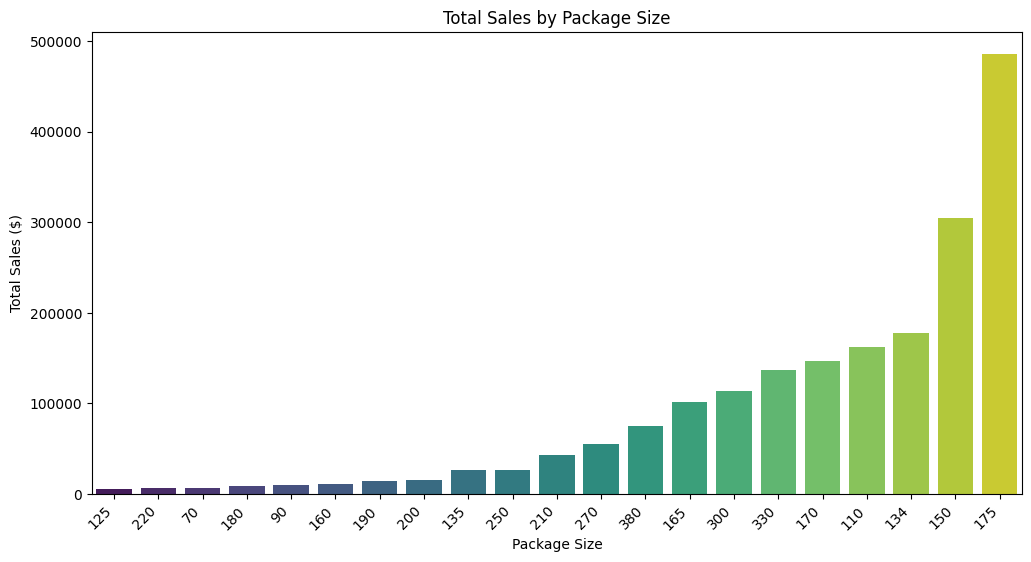

In [305]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_SIZE', y='TOT_SALES', data=total_sales_by_brand_and_pack_size, palette='viridis')
plt.xlabel('Package Size')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Package Size')
plt.xticks(rotation=45, ha='right')

plt.show()

- As we can see the highest sales with the pakage sizes `150g` &  `175g` but `175g` is higher in total sales in comparison to `150g` package so we can say that `175g` is most prefered and loved by customers.

### Conclusion from the Exploratory Data Analysis (EDA)

#### Key Findings:

1. **Customer Segmentation:**
   - **Top Segments:** OLDER FAMILIES & OLDER SINGLES/COUPLES & Retirees are the largest contributors to sales. Young Families also represent a significant segment.

2. **Brand Performance:**
   - **Top Brands:** `Kettle, Smiths, Pringles, and Doritos` have higher sales, especially among premium customers but `Kettle` have significantly higher sales than other brand.
   - **Underperforming Brands:** `Cheetos, Cheezels, snbts, woolworths, and more` have lower sales and are not preferred by premium customers.

3. **Price Sensitivity:**
   - **Premium Customers:** Prefer higher-quality brands, indicating price is not a major issue for top brands.
   - **Lower-Performing Brands:** Need to adjust pricing, improve quality, and invest in marketing.

4. **Package Size Preferences:**
   - **Preferred Sizes:** 175g and 150g packages are the most popular, with 175g leading in total sales.

#### Strategic Recommendations:

1. **Boost Top Brands:**
   - As Kettle is doing exceptionally good and have loyal customers so we should mostly focus more on other well doing brands and increase marketing for `Smiths, Pringles, and Doritos`, emphasizing quality and unique features.

2. **Revise Lower-Performing Brands:**
   - Adjust pricing, enhance quality, and improve marketing for `Old, Cheezels, Twisties, Tyrrells, and more`.

3. **Focus on Preferred Package Sizes:**
   - Promote `175g and 150g` packages to match customer preferences.

4. **Targeted Marketing:**
   - Develop strategies for key customer segments, particularly `Midage singles/couples, young and new families` with children.

5. **New Product Development:**
   - Create products catering to premium customers who are willing to spend more on quality.

These recommendations will help Julia align product offerings and marketing strategies with customer preferences, driving higher sales and satisfaction.